<a href="https://colab.research.google.com/github/SSDivyaRavali/CDS/blob/main/Module4/Image_Classification_MLP_GTSDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition. 

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013. 

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

Along with this file you should have received a zip-file containing ...

a) 900 image files with natural traffic scenes 00000.ppm - 00899.ppm

b) a text file gt.txt containing the ground truth for all traffic signs in the images

c) image sections with single traffic signs in the respective subdirectories named after the IDs (see below)

 Explanation of ground truth text file
The text file contains lines of the form
ImgNo#.ppm;#leftCol#;##topRow#;#rightCol#;#bottomRow#;#ClassID#
for each traffic sign in the dataset. 

The first field refers to the image file the traffic sign is located in.
Field 2 to 5 describe the region of interest (ROI) in that image. 
Finally, the ClassID is an integer number representing the kind of traffic sign.

### Import Required packages

In [ ]:
from pandas import DataFrame
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from pathlib import Path
from PIL import Image
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Keras
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

In [ ]:
# check Pillow version number
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.1.2


**Print the current working directory**




In [ ]:
os.getcwd()

'/content'

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

### Data Loading

### Feature Extraction

In [ ]:
DATASET_FOLDER = os.getcwd() + "/FullIJCNN2013/"

In [ ]:
def feature_label_extract():
  data = []
  labels = []
  classes = 43
  cur_path = os.getcwd()
  for i in range(classes):
    if i < 10:
      path = os.path.join(DATASET_FOLDER,str(i).zfill(2))
    else:
      path = os.path.join(DATASET_FOLDER,str(i))
    images = os.listdir(path)
    for a in images:
      try:
        image = Image.open(path + '/' + a)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
      except:
        print("Error Loading Image")

  data = np.array(data)
  labels = np.array(labels)

  return data,labels

In [ ]:
features, labels = feature_label_extract()

In [ ]:
print(f'Features Shape: {features.shape}, Labels Shape: {labels.shape}')

Features Shape: (1213, 30, 30, 3), Labels Shape: (1213,)


In [ ]:
features_tensor = tf.convert_to_tensor(features)

In [ ]:
features_tensor[0][29][29]

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([255, 255, 247], dtype=uint8)>

In [ ]:
print(f'Features Tensor Shape: {features_tensor.shape}, Labels Shape: {labels.shape}')

Features Tensor Shape: (1213, 30, 30, 3), Labels Shape: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

In [ ]:
# Iterate through folders and plot a random image from each folder
import random

def plot_sample_image():
  f = plt.figure(figsize=(60,60))
  classes = 43
  cur_path = os.getcwd()
  for i in range(classes):
    if i < 10:
      path = os.path.join(DATASET_FOLDER,str(i).zfill(2))
    else:
      path = os.path.join(DATASET_FOLDER,str(i))
    images = os.listdir(path)
    sample = random.choice(images)
    image = Image.open(path + '/' + sample)
    image = image.resize((30,30))
    f.add_subplot(1, 43, i + 1)
    plt.imshow(image)

  plt.show(block=True)

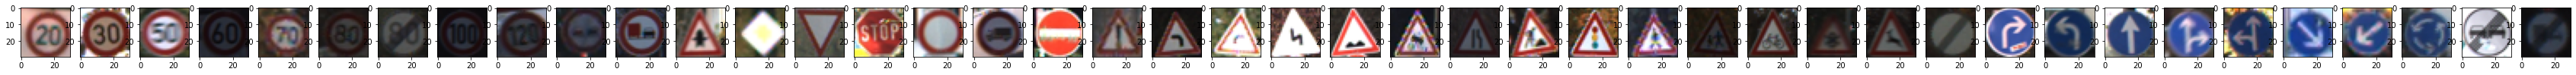

In [ ]:
plot_sample_image()

#### Plot the distribution of Classes

In [ ]:
# plot distribution of  file count of folders
from matplotlib.pyplot import figure

def plot_target_class_distribution():
  count_arr = np.bincount(labels)
  classes = 43

  x = np.arange(0, classes) 
  y = count_arr

  figure(figsize=(9, 6), dpi=80)

  plt.bar(x, y, align = 'center') 
  plt.title('Bar graph') 
  plt.ylabel('Number of Samples') 
  plt.xlabel('Class types')  
  plt.xticks(range(classes),  rotation='vertical')
  plt.show()


In [ ]:
# Checking for class bias
def check_target_class_bias():
  unique_labels, Label_count = np.unique(labels, return_counts = True)
  print(np.asarray((unique_labels)))
  plt.bar( np.arange( 43 ), Label_count, align='center',color='blue' )
  plt.xlabel('Class')
  plt.ylabel('No of Training data files')
  plt.xlim([-1, 43])

  plt.show()

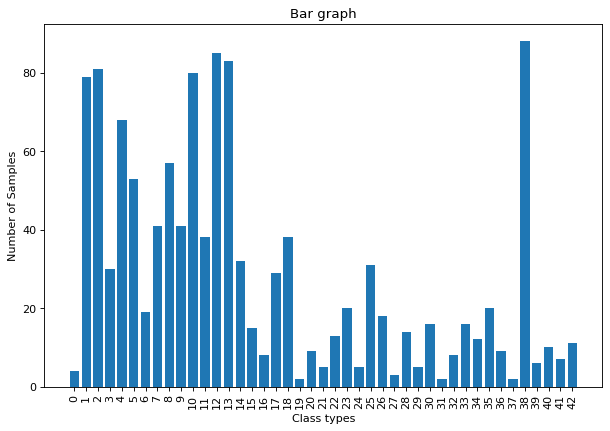

In [ ]:
plot_target_class_distribution()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


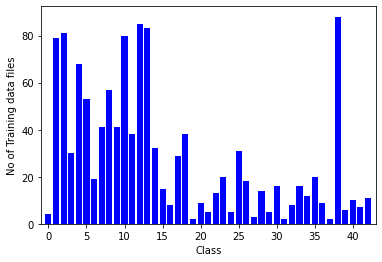

In [ ]:
check_target_class_bias()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
def normalize_and_flatten_features(features):
  # confirm pixel range is 0-255
  print('Data Type: %s' % features.dtype)
  print('Min: %.3f, Max: %.3f' % (features.min(), features.max()))
  # convert from integers to floats
  features = features.astype('float64')
  # normalize to the range 0-1
  features /= 255.0
  # confirm the normalization
  print('Min: %.3f, Max: %.3f' % (features.min(), features.max()))

  #Recheck Distribution after normalization
  img_np = np.array(features[0]) #Sample image
  # plot the pixel values
  plt.hist(img_np.ravel(), bins=50, density=True)
  plt.xlabel("pixel values")
  plt.ylabel("relative frequency")
  plt.title("distribution of pixels")

  features = features.reshape(1213, 30*30*3)

  return features

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


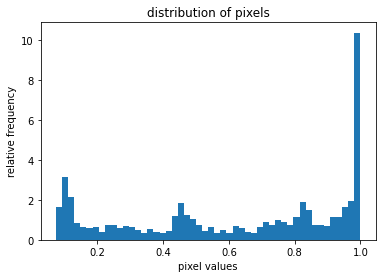

In [ ]:
features_new = normalize_and_flatten_features(features)

In [ ]:
def get_train_and_test_data(features, labels,test_size):
  #split the data using in test, train - Stratified Shuffle and Split
  sss = StratifiedShuffleSplit(n_splits=10, test_size=test_size, random_state=42)
  sss.get_n_splits(features, labels)

  for train_index, test_index in sss.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
  
  return sss, (X_train, X_test), (y_train, y_test)

In [ ]:
stratified_shuffle_split, (X_train, X_test), (y_train, y_test) = get_train_and_test_data(features_new, labels,test_size=0.3)

In [ ]:
#split the train data into train & validation
X_train, X_val, y_train, y_val = train_test_split(features_new, labels,test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((970, 2700), (970,))

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
model_raw = MLPClassifier()
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_score(y_test, y_pred_raw)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9642857142857143

In [ ]:
model = MLPClassifier(activation='logistic', 
                      max_iter=10000, 
                      hidden_layer_sizes=(300,50)
                      )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.989010989010989

In [ ]:
#Accuracy on validation data
y_pred_val = model.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.8930041152263375

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
parameters_dict = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (300, 50)],
    'activation': ['tanh', 'relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
clf = GridSearchCV(model_raw, parameters_dict, n_jobs=-1, cv=3)
clf.fit(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (300, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.05,
 'hidden_layer_sizes': (300, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
model_1 = MLPClassifier(activation='tanh', 
                        alpha=0.05,
                        max_iter=10000, 
                        hidden_layer_sizes=(300, 50),
                        solver='adam',
                        learning_rate='constant'
                      )
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_score(y_test, y_pred_1)

0.9862637362637363

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE - normal ML algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
scores = [] 
# using regression to get predicted data
features = features.reshape(1213,30*30*3)
print(features.shape)
rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=7)
for train_index, test_index in stratified_shuffle_split.split(features, labels):
  X_train, X_test = features[train_index], features[test_index]
  y_train, y_test = labels[train_index], labels[test_index]
  rf.fit(X_train, y_train)
  pred = rf.predict(X_test)
  scores.append(accuracy_score(y_test, pred))

# get accurracy of each prediction
print(max(scores))

(1213, 2700)
0.6593406593406593


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC(random_state=7)
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1,1,10]}
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=SVC(random_state=7),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
clf.cv_results_['params']

[{'C': 0.1, 'kernel': 'linear'},
 {'C': 0.1, 'kernel': 'rbf'},
 {'C': 1, 'kernel': 'linear'},
 {'C': 1, 'kernel': 'rbf'},
 {'C': 10, 'kernel': 'linear'},
 {'C': 10, 'kernel': 'rbf'}]

In [ ]:
pred = clf.predict(X_test)

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
# ** TODO **
#We need to add the keras ImageDAta Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=DATASET_FOLDER,
                                                 shuffle=True,
                                                 target_size=(30, 30), 
                                                 subset="training",
                                                 class_mode='binary')

testing_dataset = image_generator.flow_from_directory(batch_size=32,
                                                 directory=DATASET_FOLDER,
                                                 shuffle=True,
                                                 target_size=(30, 30), 
                                                 subset="validation",
                                                 class_mode='binary')

Found 987 images belonging to 43 classes.
Found 226 images belonging to 43 classes.


In [ ]:
from keras.layers import Flatten

In [ ]:
# Step 1 - Build the architecture
k_model = Sequential()
k_model.add(Flatten(input_shape=[2700]))
k_model.add(Dense(300, activation="tanh"))
#k_model.add(Dense(30, activation="tanh"))
k_model.add(Dense(43, activation="softmax"))

In [ ]:
# Step 2 - Compile the model
k_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"],
              )

In [ ]:
hist = k_model.fit_generator(
    train_dataset,
    epochs=100,
    validation_data=testing_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
31/31 [==============================] - 1s 23ms/step - loss: 3.3847 - accuracy: 0.2310 - val_loss: 2.6999 - val_accuracy: 0.3363
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 2.3821 - accuracy: 0.4154 - val_loss: 2.1942 - val_accuracy: 0.4469
Epoch 3/100
31/31 [==============================] - 1s 16ms/step - loss: 1.8640 - accuracy: 0.5410 - val_loss: 2.0348 - val_accuracy: 0.4558
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 1.5247 - accuracy: 0.6393 - val_loss: 1.6859 - val_accuracy: 0.5841
Epoch 5/100
31/31 [==============================] - 1s 16ms/step - loss: 1.2801 - accuracy: 0.6839 - val_loss: 1.6461 - val_accuracy: 0.5221
Epoch 6/100
31/31 [==============================] - 1s 17ms/step - loss: 1.1038 - accuracy: 0.7204 - val_loss: 1.3313 - val_accuracy: 0.6681
Epoch 7/100
31/31 [==============================] - 0s 16ms/step - loss: 0.9440 - accuracy: 0.7842 - val_loss: 1.2790 - val_accuracy: 0.6681
Epoch 

In [ ]:
k_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 300)               810300    
                                                                 
 dense_1 (Dense)             (None, 43)                12943     
                                                                 
Total params: 823,243
Trainable params: 823,243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Step 1 - Build the architecture
k_model = Sequential()
k_model.add(Flatten(input_shape=[2700]))
k_model.add(Dense(300, activation="tanh"))
#k_model.add(Dense(30, activation="tanh"))
k_model.add(Dense(43, activation="softmax"))

In [ ]:
# Step 2 - Compile the model
k_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"],
              )

In [ ]:
# Step 3 - Fit and Evaluate the model
history = k_model.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val))

Epoch 1/100
31/31 [==============================] - 1s 14ms/step - loss: 3.3533 - accuracy: 0.2010 - val_loss: 2.8633 - val_accuracy: 0.3128
Epoch 2/100
31/31 [==============================] - 0s 9ms/step - loss: 2.3820 - accuracy: 0.4237 - val_loss: 2.4842 - val_accuracy: 0.3909
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 1.9078 - accuracy: 0.5351 - val_loss: 2.0972 - val_accuracy: 0.4568
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 1.6249 - accuracy: 0.5825 - val_loss: 1.9278 - val_accuracy: 0.5021
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3842 - accuracy: 0.6598 - val_loss: 1.7123 - val_accuracy: 0.5761
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 1.1848 - accuracy: 0.7031 - val_loss: 1.5095 - val_accuracy: 0.5638
Epoch 7/100
31/31 [==============================] - 0s 11ms/step - loss: 1.0571 - accuracy: 0.7278 - val_loss: 1.3756 - val_accuracy: 0.6337
Epoch 8/10

In [ ]:
k_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 5ms/step - loss: 0.0672 - accuracy: 0.9835


[0.06720912456512451, 0.9835164546966553]

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
k1_model = Sequential()
k1_model.add(Flatten(input_shape=[2700]))
k1_model.add(Dense(300, activation="tanh"))
k1_model.add(Dense(50, activation="tanh"))
k1_model.add(Dense(43, activation="softmax"))

k1_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"],
              )

history = k1_model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))
k1_model.evaluate(X_test, y_test)

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
k2_model = Sequential([
    Flatten(input_shape=[2700]),
    Dense(300, activation="tanh"),
    Dropout(rate=0.1),
    #BatchNormalization(),
    Dense(100, activation="tanh"),
    #Dropout(rate=0.2),
    #BatchNormalization(),
    Dense(43, activation="softmax")
])

In [ ]:
k2_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["accuracy"],
              )

In [ ]:
history = k2_model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val))

Epoch 1/50
31/31 [==============================] - 1s 17ms/step - loss: 3.4151 - accuracy: 0.1247 - val_loss: 3.1303 - val_accuracy: 0.1934
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 2.8190 - accuracy: 0.2959 - val_loss: 2.6249 - val_accuracy: 0.3210
Epoch 3/50
31/31 [==============================] - 0s 10ms/step - loss: 2.3847 - accuracy: 0.3887 - val_loss: 2.2080 - val_accuracy: 0.4239
Epoch 4/50
31/31 [==============================] - 0s 10ms/step - loss: 2.0013 - accuracy: 0.4433 - val_loss: 2.0486 - val_accuracy: 0.4239
Epoch 5/50
31/31 [==============================] - 0s 10ms/step - loss: 1.7418 - accuracy: 0.5299 - val_loss: 1.7263 - val_accuracy: 0.5144
Epoch 6/50
31/31 [==============================] - 0s 10ms/step - loss: 1.4903 - accuracy: 0.5845 - val_loss: 1.6147 - val_accuracy: 0.5761
Epoch 7/50
31/31 [==============================] - 0s 10ms/step - loss: 1.2902 - accuracy: 0.6680 - val_loss: 1.4396 - val_accuracy: 0.5885
Epoch 8/50
31

In [ ]:
k2_model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.0761 - accuracy: 0.9753


[0.07611604779958725, 0.9752747416496277]

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any. 
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.